In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import plotly.tools as tls
import plotly.plotly as py

bf = pd.read_csv('../Dataset/black_friday.csv', engine = 'python',header = None)
bf.head(10)


0
0   8370
1  15200
2   1422
3   1057
4   7969
5  15227
6  19215
7  15854
8  15686
9   7871

In [3]:
bf.tail(10)

0
537567   1994
537568   5930
537569   7042
537570  15491
537571  11852
537572  11664
537573  19196
537574   8043
537575   7172
537576   6875

# Statical Description

In [4]:
purchase = bf[0]
Min = purchase.min()
print("Minimum value = " + str(Min))

Max = purchase.max()
print("Makimum value = " + str(Max))

Mean = purchase.mean()
print("Mean value = " + str(Mean))

Mode = purchase.mode()[0]
print("Mode value = " + str(Mode))

Median = purchase.median()
print("Median value = " + str(Median))

Variance = purchase.var()
print("Variance value = " + str(Variance))

std = purchase.std()
print("Standard Deviation value = " + str(std))

skew = purchase.std()
print("Skewness value  = " + str(skew))

kur = purchase.kurtosis()
print("Kurtosis value = " + str(kur))

Minimum value = 185
Makimum value = 23961
Mean value = 9333.859852635065
Mode value = 6855
Median value = 8062.0
Variance value = 24810581.486013696
Standard Deviation value = 4981.022132656479
Skewness value  = 4981.022132656479
Kurtosis value = -0.34312137256836284


# Visualisasi Data Histogram

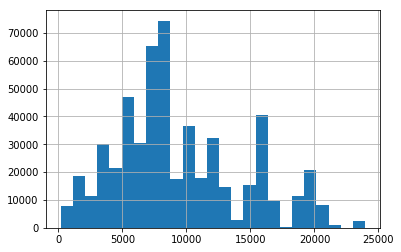

In [5]:
bin_size = 25
purchase.hist(bins = bin_size)

# Visualisasi Data Box Plot

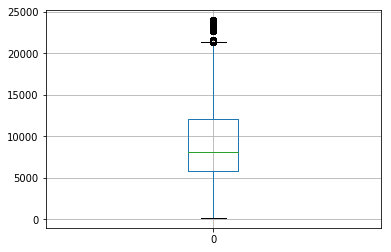

In [6]:
bf.boxplot()

In [7]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,
        st.beta,
        st.gamma,
        st.norm,
        st.uniform
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

In [8]:
data_tmp = purchase.divide(1000)
data_tmp

0          8.370
1         15.200
2          1.422
3          1.057
4          7.969
5         15.227
6         19.215
7         15.854
8         15.686
9          7.871
10         5.254
11         3.957
12         6.073
13        15.665
14         5.378
15         2.079
16        13.055
17         8.851
18        11.788
19        19.614
20         8.584
21         9.872
22         9.743
23         5.982
24        11.927
25        16.662
26         5.887
27         6.973
28         5.391
29        16.352
           ...  
537547    11.543
537548    20.924
537549    13.082
537550    11.658
537551     6.863
537552    16.415
537553    18.526
537554     7.099
537555     0.578
537556     2.183
537557    12.724
537558     7.796
537559     7.770
537560     5.940
537561     7.834
537562    11.508
537563     6.074
537564     7.084
537565     7.934
537566     5.350
537567     1.994
537568     5.930
537569     7.042
537570    15.491
537571    11.852
537572    11.664
537573    19.196
537574     8.0

In [9]:
data_tmp.round()


0          8.0
1         15.0
2          1.0
3          1.0
4          8.0
5         15.0
6         19.0
7         16.0
8         16.0
9          8.0
10         5.0
11         4.0
12         6.0
13        16.0
14         5.0
15         2.0
16        13.0
17         9.0
18        12.0
19        20.0
20         9.0
21        10.0
22        10.0
23         6.0
24        12.0
25        17.0
26         6.0
27         7.0
28         5.0
29        16.0
          ... 
537547    12.0
537548    21.0
537549    13.0
537550    12.0
537551     7.0
537552    16.0
537553    19.0
537554     7.0
537555     1.0
537556     2.0
537557    13.0
537558     8.0
537559     8.0
537560     6.0
537561     8.0
537562    12.0
537563     6.0
537564     7.0
537565     8.0
537566     5.0
537567     2.0
537568     6.0
537569     7.0
537570    15.0
537571    12.0
537572    12.0
537573    19.0
537574     8.0
537575     7.0
537576     7.0
Name: 0, Length: 537577, dtype: float64

In [10]:
data_tmp.value_counts()

6.855     186
7.011     185
7.193     182
6.891     182
6.879     181
7.012     180
7.027     180
7.165     179
7.166     179
6.883     179
6.960     178
6.923     176
7.093     176
6.858     176
6.868     176
7.089     176
7.114     175
7.167     175
7.060     174
7.185     174
6.928     174
6.931     174
6.973     173
7.146     173
6.904     173
7.047     173
7.108     172
7.081     171
7.085     171
7.034     171
         ... 
21.502      1
14.330      1
11.267      1
21.091      1
13.962      1
15.043      1
17.411      1
8.916       1
7.315       1
17.111      1
17.014      1
3.328       1
18.408      1
18.477      1
10.453      1
11.299      1
4.829       1
0.351       1
11.142      1
9.018       1
10.525      1
13.885      1
15.154      1
23.856      1
14.317      1
9.088       1
3.275       1
9.437       1
17.328      1
10.333      1
Name: 0, Length: 17959, dtype: int64

In [32]:
def Miskin(data) :
    count = 0
    for i in data :
        if(data[i]<1000):
            count = count+1
    return count

def Kaya(data) :
    count = 0
    for i in data :
        if(data[i]>10000):
            count = count+1
    return count

def CrazyRich(data) :
    count = 0
    for i in data :
        if(data[i]>20000):
            count = count+1
    return count

In [29]:
Jumlah_Miskin = Miskin(purchase)
Jumlah_Kaya = Kaya(purchase)
Jumlah_CrazyRich = CrazyRich(purchase)

data = []
data.append(Jumlah_Miskin)
data.append(Jumlah_Kaya)
data.append(Jumlah_CrazyRich)

In [27]:
Ekspetasi_Miskin = 250*Jumlah_Miskin/len(purchase)
Ekspetasi_Kaya = 250*Jumlah_Kaya/len(purchase)
Ekspetasi_CrazyRich = 250*Jumlah_CrazyRich/len(purchase)

# A. Jika terdapat 250 orang pembeli baru yang mengikuti Black Friday, tentukan ekspetasi jumlah orang miskin, kaya, dan crazy rich 

i. Ekspetasi jumlah orang miskin

In [33]:
print(Ekspetasi_Miskin)

3.284651844576395


ii. Ekspetasi jumlah orang kaya

In [34]:
print(Ekspetasi_Kaya)

83.76024971352888


iii. Ekspetasi jumlah orang Crazy Rich

In [35]:
print(Ekspetasi_CrazyRich)

5.169966665178505


In [36]:
def Galaxy(data) :
    count = 0
    for i in data :
        if(data[i]>1980) and data[i]<2000:
            count = count+1
    return count

def Mac(data) :
    count = 0
    for i in data :
        if(data[i]>2707) and data[i]<2897:
            count = count+1
    return count
    

In [39]:
Jumlah_Galaxy = Galaxy(purchase)
Jumlah_Mac = Mac(purchase)
Ekspetasi_Galaxy = 1000*Jumlah_Galaxy/len(purchase)
Ekspetasi_Mac = 1000*Jumlah_Mac/len(purchase)

# B. Jika terdapat 1000 orang pembeli baru yang mengikuti Black Friday, tentukan ekspektasi jumlah orang yang pengeluarannya membeli Galaxy Fold dan MacBook Pro+ iPhone XR + AirPods

i. Ekspetasi jumlah orang pembeli Galaxy Fold

In [42]:
print(Ekspetasi_Galaxy)

0.9226602378082355


ii. Ekspetasi jumlah orang pembeli MacBook Pro Touch Bar 256GB + iPhone XR + AirPods 2

In [41]:
print(Ekspetasi_Mac)

7.146896438829114
